In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


import warnings
warnings.filterwarnings("ignore",)

In [2]:
train = pd.read_csv('Data/Train.csv')
test = pd.read_csv('Data/Test.csv')

In [3]:
print(train.shape)
train.head()

(33908, 17)


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
0,-0.276515,-0.424429,1.344997,-0.012283,0.076230,1.076648,0.182198,3,0,1,0,0,0,0,10,2,1
1,0.853573,0.150991,0.503892,-0.979179,-0.569351,-0.411453,-0.251940,4,1,2,0,1,0,0,0,3,0
2,0.947747,-0.173832,1.825628,-0.703478,0.076230,-0.411453,-0.251940,6,1,2,0,0,0,0,5,3,0
3,0.853573,-0.381404,0.984523,-0.039464,-0.569351,-0.411453,-0.251940,4,0,2,0,1,0,0,5,3,0
4,1.324443,1.590527,-1.178318,-0.097711,-0.246560,-0.411453,-0.251940,0,1,1,0,0,0,0,8,3,0


In [4]:
print(test.shape)
test.head()

(11303, 16)


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,0.571051,0.406843,0.984523,0.011016,-0.569351,-0.411453,-0.251940,0,1,1,0,0,0,0,11,3
1,-1.124080,-0.166935,0.503892,-0.322932,0.721811,0.547323,0.182198,0,2,1,0,0,0,0,5,1
2,0.476877,0.145079,-0.577529,-0.691828,-0.246560,-0.411453,-0.251940,0,1,1,0,0,0,0,1,3
3,1.606965,-0.447419,1.825628,-0.983062,7.177616,-0.411453,-0.251940,1,1,0,0,1,0,0,5,3
4,-0.935732,-0.364653,-1.178318,-0.322932,0.076230,-0.411453,-0.251940,8,2,1,0,1,0,2,8,3


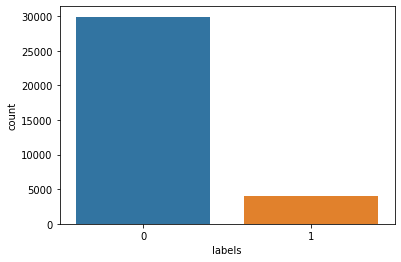

In [5]:
sns.countplot(train['labels'])

In [6]:
train.isnull().sum()

feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
labels        0
dtype: int64

In [7]:
train.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
count,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000
mean,-0.004158,0.002584,-0.000213,-0.000053,-0.000298,-0.004652,-0.007498,4.336381,1.171051,1.225345,0.018137,0.555503,0.159667,0.639407,5.520497,2.562375,0.116993
std,0.999776,1.014268,1.000872,1.002512,1.003724,0.993984,0.802696,3.273376,0.606730,0.749104,0.133450,0.496917,0.366303,0.897627,3.003241,0.987148,0.321417
min,-2.159994,-3.081149,-1.779108,-1.002478,-0.569351,-0.411453,-0.251940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.747384,-0.422787,-0.938003,-0.602517,-0.569351,-0.411453,-0.251940,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000
50%,-0.182341,-0.297324,0.023260,-0.303517,-0.246560,-0.411453,-0.251940,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,6.000000,3.000000,0.000000
75%,0.665225,0.022901,0.624050,0.236237,0.076230,-0.411453,-0.251940,7.000000,2.000000,2.000000,0.000000,1.000000,0.000000,2.000000,8.000000,3.000000,0.000000
max,5.091402,33.094776,1.825628,18.094700,19.443647,8.127648,23.625644,11.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,11.000000,3.000000,1.000000


In [8]:
train.skew().sort_values()

feature_15   -1.982928
feature_14   -0.478875
feature_11   -0.223403
feature_8    -0.102319
feature_2     0.090631
feature_9     0.198701
feature_7     0.265169
feature_0     0.686267
feature_13    0.771442
feature_12    1.858314
labels        2.383383
feature_5     2.635939
feature_3     3.214663
feature_4     5.006206
feature_10    7.222053
feature_6     7.330242
feature_1     8.638638
dtype: float64

In [9]:
#  list of discrete variables
discrete_vars = [var for var in train.columns if len(train[var].unique())<20 and var not in ['labels']]

print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  9


In [10]:
# list of continuous variables
cont_vars = [var for var in train.columns if var not in discrete_vars+['labels']]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  7


In [11]:
# let's visualise the discrete variables
train[discrete_vars].head()

,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,3,0,1,0,0,0,0,10,2
1,4,1,2,0,1,0,0,0,3
2,6,1,2,0,0,0,0,5,3
3,4,0,2,0,1,0,0,5,3
4,0,1,1,0,0,0,0,8,3


In [12]:
# let's visualise the continuos variables
train[cont_vars].head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6
0,-0.276515,-0.424429,1.344997,-0.012283,0.076230,1.076648,0.182198
1,0.853573,0.150991,0.503892,-0.979179,-0.569351,-0.411453,-0.251940
2,0.947747,-0.173832,1.825628,-0.703478,0.076230,-0.411453,-0.251940
3,0.853573,-0.381404,0.984523,-0.039464,-0.569351,-0.411453,-0.251940
4,1.324443,1.590527,-1.178318,-0.097711,-0.246560,-0.411453,-0.251940


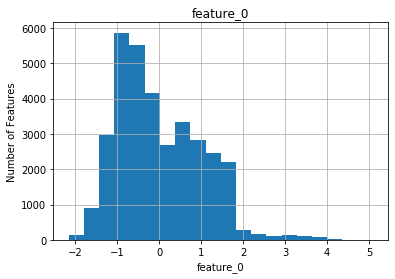

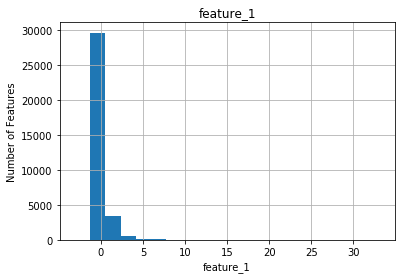

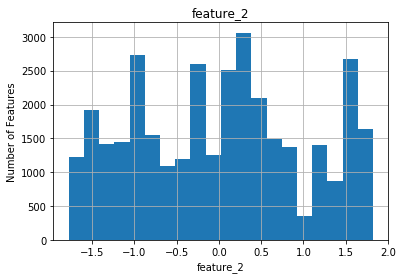

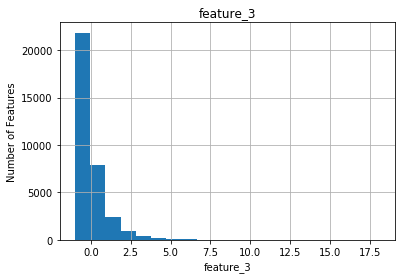

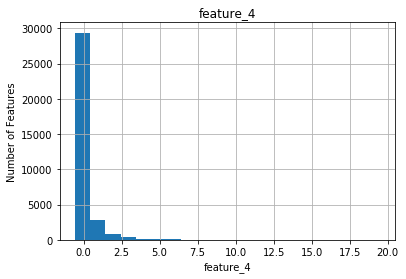

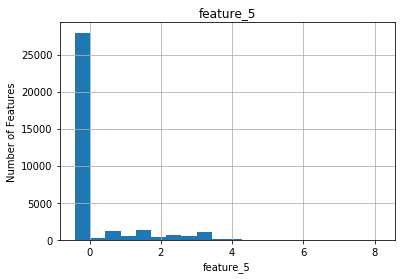

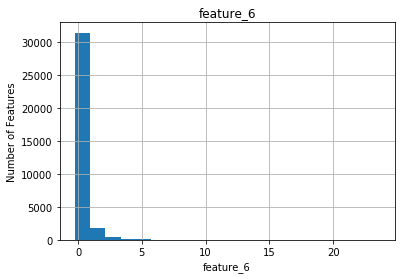

In [13]:
# Let's go ahead and analyse the distributions of these variables
def analyse_continous(df, var):
    df = df.copy()
    df[var].hist(bins=20)
    plt.ylabel('Number of Features')
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
for var in cont_vars:
    analyse_continous(train, var)

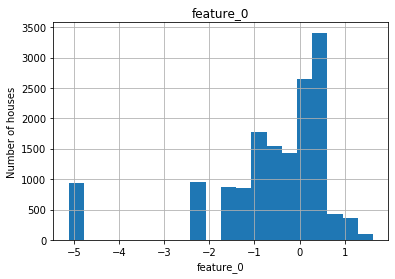

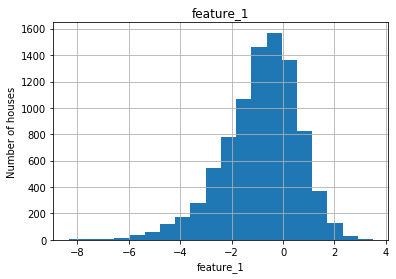

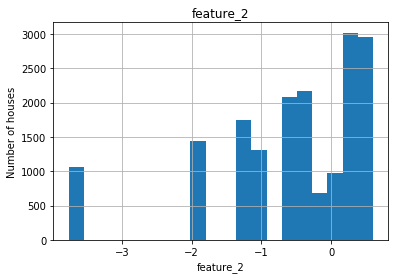

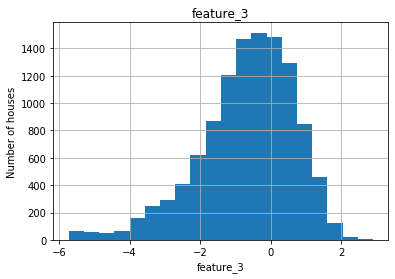

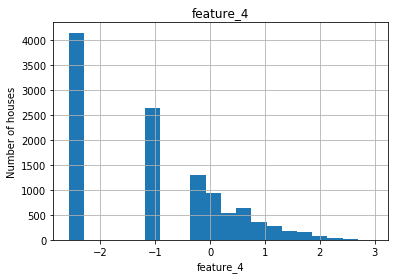

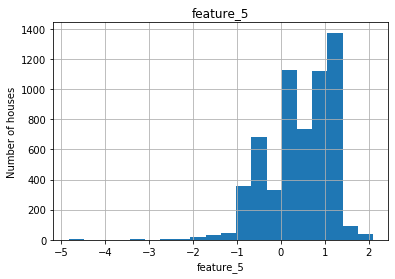

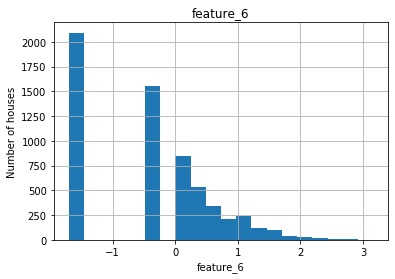

In [14]:
# Let's go ahead and analyse the distributions of these variables
def analyse_transformed_continous(df, var):
    df = df.copy()
    
#     # log does not take negative values, so let's be careful and skip those variables
#     if 0 in train[var].unique():
#         pass
#     else:
        # log transform the variable
    df[var] = np.log(df[var])
    df[var].hist(bins=20)
    plt.ylabel('Number of houses')
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
for var in cont_vars:
    analyse_transformed_continous(train, var)

In [15]:
from imblearn.over_sampling import SMOTE
# First i will try for Smote if it was not good mean we will apply for the undersampling
over = SMOTE()

Using TensorFlow backend.


In [16]:
X = train.drop('labels', axis=1)  # Keep all features except 'Labels'
y = train['labels']  # Just keep 'Labels'

In [17]:
X, y = over.fit_resample(X,y)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=7)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      6018
           1       0.93      0.97      0.95      5959

    accuracy                           0.95     11977
   macro avg       0.95      0.95      0.95     11977
weighted avg       0.95      0.95      0.95     11977



In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Assess model performance
lr = LogisticRegression()
lr.fit(X_train, y_train)
strat_kfold = StratifiedKFold(10, random_state=7)
score = cross_val_score(lr, X_train, y_train, scoring='accuracy', cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(score), np.std(score)))


CV accuracy: 0.813 +/- 0.005
